# Runge-Kutta
以Euler method為基礎，使得數值近似更快更精準

此方法內建在scipy的 solve_ivp之下，支援多個initial value以一維矩陣方式輸入



In [ ]:
from scipy.integrate import solve_ivp
from numpy import exp
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def dydx(x, y):
    return y
x = np.linspace(0, 10, 11)
sol = solve_ivp(dydx, [0, 10], [1, 2, 3], t_eval = x)

In [41]:
def RK45(x0, y0, dfdx, d):
    k1 = dfdx(x0, y0)
    x1 = x0 + d/2
    y1 = y0 + k1*d/2
    
    k2 = dfdx(x1, y1)
    y2 = y0 + k2*d/2
    x2 = x0 + d/2
    
    k3 = dfdx(x2, y2)
    y3 = y0 + k3* d
    x3 = x0 + d
    
    k4 = dfdx(x3, y3)
    
    k = (k1 + 2*k2 + 2*k3 + k4)/6
    y = y0 + k*d
    x = x0 + d
    return x, y

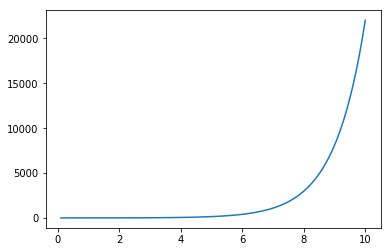

In [54]:
x_t = []
y_t = []
for i in range(100):
    if i == 0:
        x_t.append(RK45(0, 1, dydx, 0.1)[0])
        y_t.append(RK45(0, 1, dydx, 0.1)[1])
        x_p, y_p = RK45(0, 1, dydx, 0.1)
    else:
        x_t.append(RK45(x_p, y_p, dydx, 0.1)[0])
        y_t.append(RK45(x_p, y_p, dydx, 0.1)[1])
        x_p, y_p = RK45(x_p, y_p, dydx, 0.1)


#plt.plot(sol.t, sol.y[0])
#plt.plot(x, exp(x))
plt.plot(x_t, y_t)
plt.show()